In [150]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

taken from https://www.tensorflow.org/tutorials/structured_data/time_series#inspect_and_cleanup 

In [159]:
train = pd.read_csv('data/train.csv', index_col="ID")
train['clouds'] = train['clouds'].fillna(0)
train.head()

,measurement_time,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
ID,,,,,,,,,,,,,,,,
0,2023-11-01 00:00:00,3.400000,27.600000,18.799999,19.750000,21.100000,20.129892,0.0,0.0,0.0,0.0,0.0,8.97,2.06,140.0,20.0
1,2023-11-01 01:00:00,2.933333,28.400000,18.933333,19.833333,21.033333,20.052919,0.0,0.0,0.0,0.0,0.0,9.19,2.06,110.0,100.0
2,2023-11-01 02:00:00,7.166667,29.400000,19.000000,19.799999,21.000000,19.992375,0.0,0.0,0.0,0.0,0.0,9.42,2.57,140.0,20.0
3,2023-11-01 03:00:00,10.500000,30.100000,19.033333,19.933333,24.600000,19.941565,0.0,0.0,0.0,0.0,0.0,9.19,2.57,150.0,100.0
4,2023-11-01 04:00:00,8.733334,31.866666,19.100000,20.000000,24.700000,19.924502,0.0,0.0,0.0,0.0,0.0,9.99,2.57,160.0,100.0


In [152]:
date_time = pd.to_datetime(train.pop('measurement_time'), format='%Y-%m-%d %H:%M:%S')


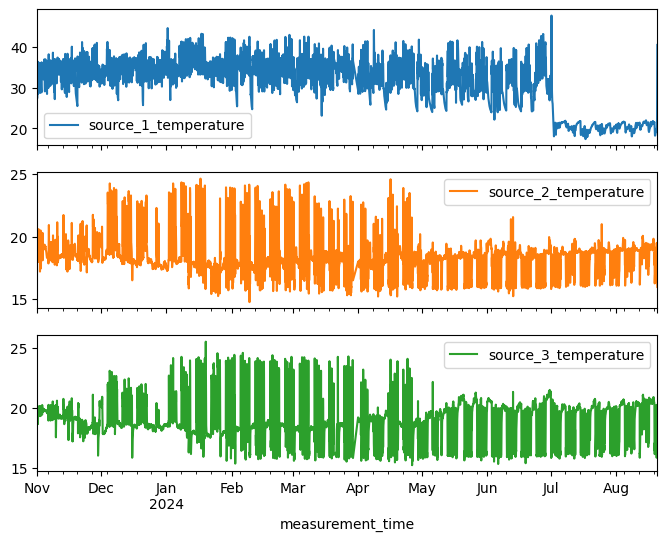

In [153]:
plot_features = train[['source_1_temperature', 'source_2_temperature', 'source_3_temperature']]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

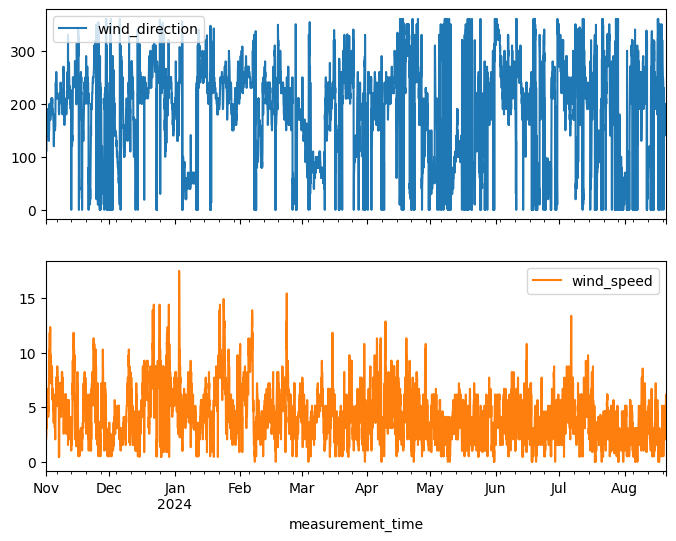

In [154]:
plot_features = train[['wind_direction', 'wind_speed']]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [155]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7047.0,13.902992,11.582678,0.466667,4.800000,8.575000,21.633333,60.533333
source_1_temperature,7047.0,31.353220,5.961416,17.400000,28.612500,33.300000,35.641667,47.700001
source_2_temperature,7047.0,18.285482,1.388247,14.750000,17.633334,18.266666,18.833333,24.650001
source_3_temperature,7047.0,18.765825,1.616728,15.200000,17.925000,18.650000,19.833333,25.533333
source_4_temperature,7047.0,21.941836,2.111493,16.566667,20.829597,21.533333,22.600000,31.466667
mean_room_temperature,7047.0,20.591658,1.067446,17.706746,19.807871,20.763321,21.310412,23.621292
sun_radiation_east,7047.0,131.326270,218.094756,0.000000,0.000000,14.354839,138.258065,796.000000
sun_radiation_west,7047.0,136.768829,219.425579,0.000000,0.000000,9.225806,149.467742,807.000000
sun_radiation_south,7047.0,195.958575,272.681407,0.000000,0.000000,10.500000,416.908602,861.000000
sun_radiation_north,7047.0,47.121580,57.183783,0.000000,0.000000,9.806452,96.500000,226.000000


Text(0, 0.5, 'Wind Velocity [m/s]')

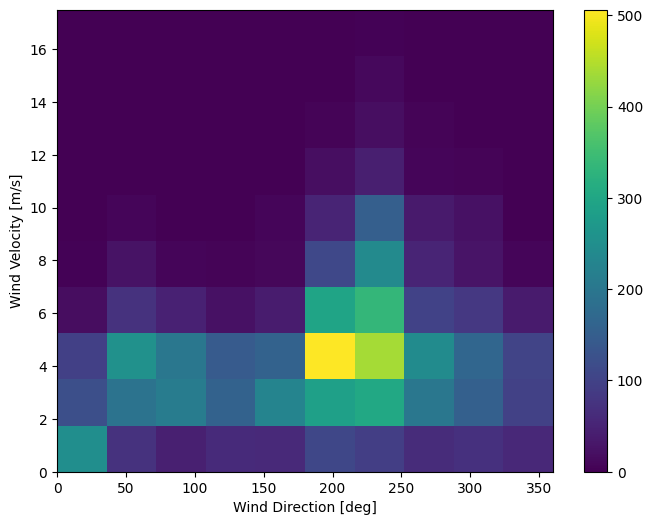

In [156]:
plt.hist2d(train['wind_direction'], train['wind_speed'])
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [160]:
wv = train.pop('wind_speed')

# Convert to radians.
wd_rad = train.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
train['Wx'] = wv*np.cos(wd_rad)
train['Wy'] = wv*np.sin(wd_rad)


(np.float64(-13.398117310150925),
 np.float64(9.256141579486165),
 np.float64(-13.678979689339572),
 np.float64(8.0193952390439))

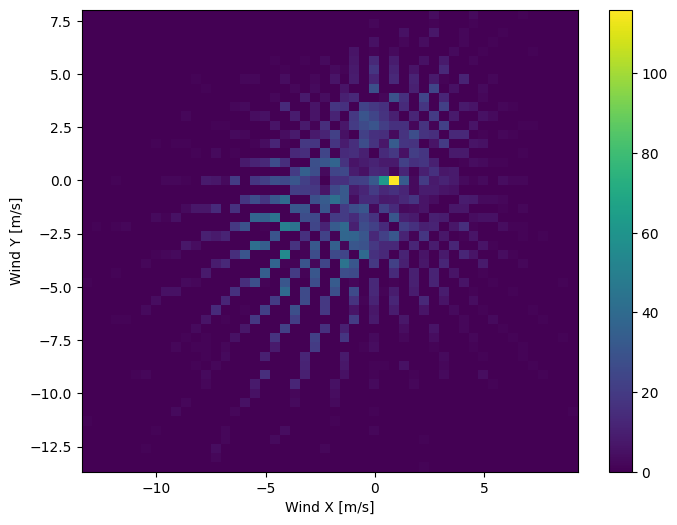

In [91]:
plt.hist2d(train['Wx'], train['Wy'], bins=(50, 50))
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [92]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [93]:
day = 24*60*60
year = (365.2425)*day

train['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
train['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
train['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
train['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

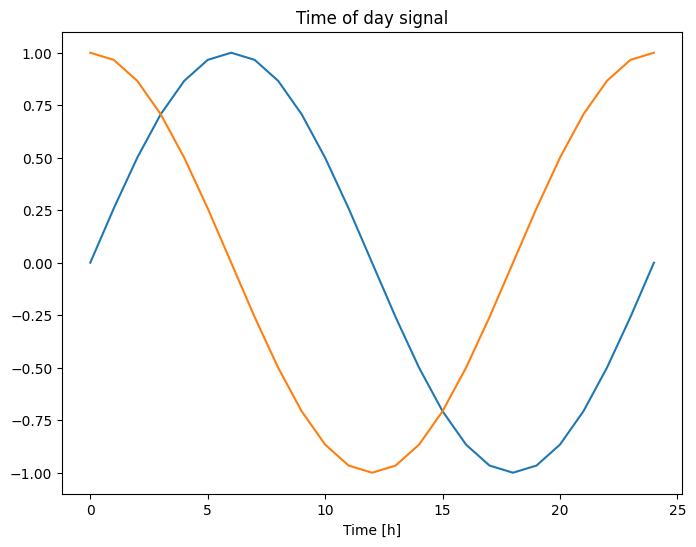

In [94]:
plt.plot(np.array(train['Day sin'])[:25])
plt.plot(np.array(train['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [149]:
train

In [95]:
column_indices = {name: i for i, name in enumerate(train.columns)}

n = len(train)
train_df = train[0:int(n*0.7)]
val_df = train[int(n*0.7):int(n*0.9)]
test_df = train[int(n*0.9):]

num_features = train.shape[1]

In [96]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\trist_243cr5c\AppData\Local\Temp\ipykernel_5224\2021782227.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(train.keys(), rotation=90)


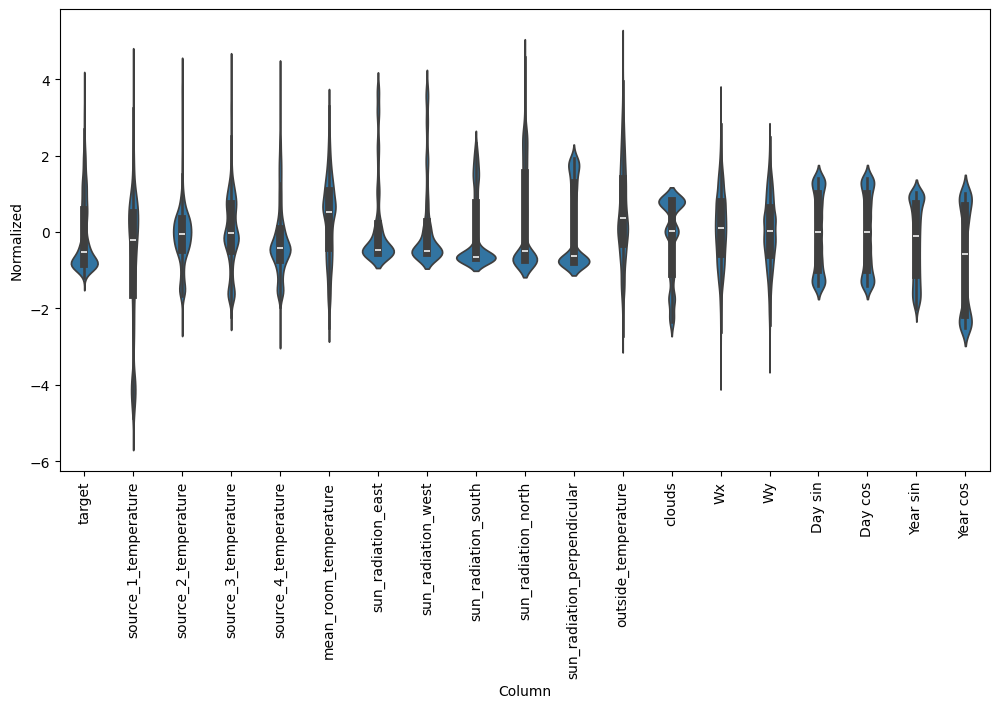

In [97]:
df_std = (train - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train.keys(), rotation=90)

In [98]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [99]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['target'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['target']

In [100]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['target'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['target']

In [101]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [102]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


In [103]:
w2.example = example_inputs, example_labels

In [104]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('measurement_time')

WindowGenerator.plot = plot

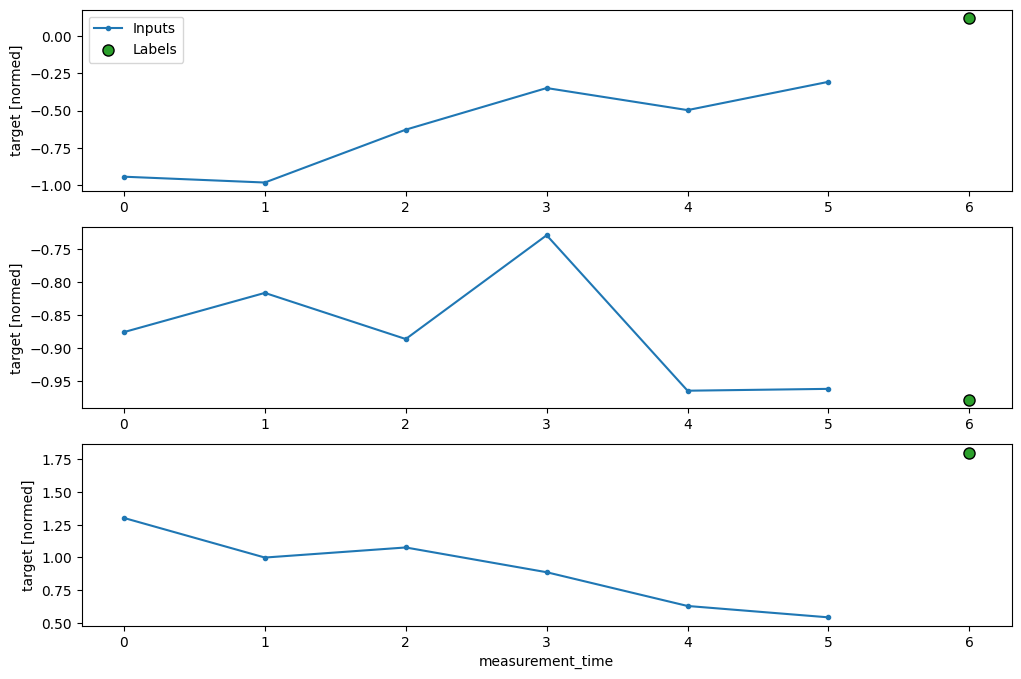

In [105]:
w2.plot()

In [106]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [107]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [108]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [109]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [110]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [111]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [112]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [113]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1419 - mean_absolute_error: 0.2332 


In [114]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['target'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['target']

In [115]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


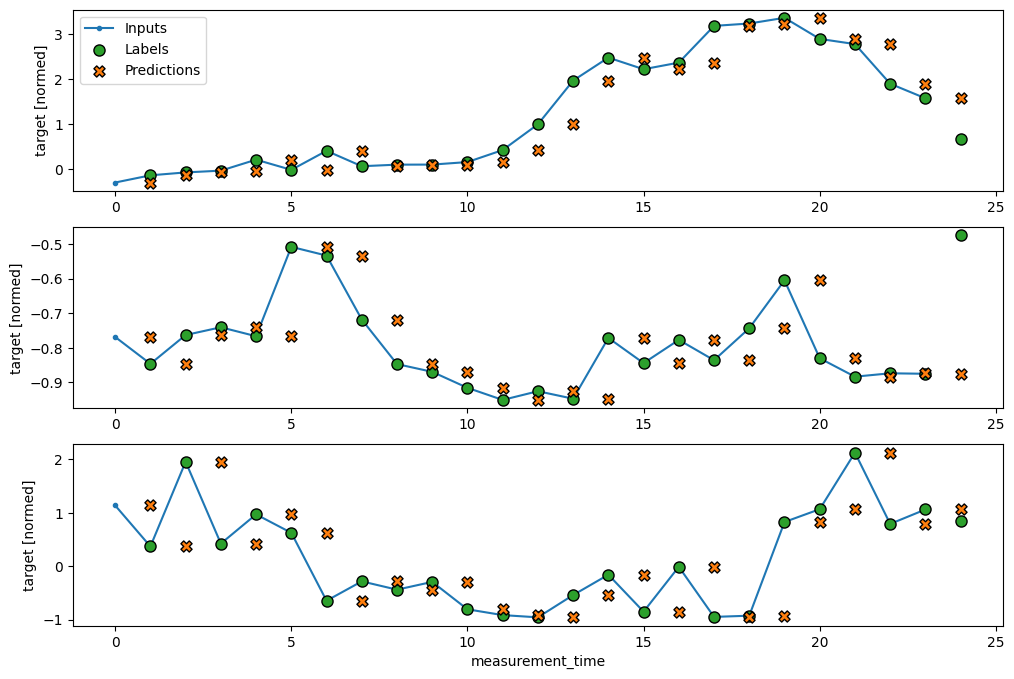

In [116]:
wide_window.plot(baseline)

In [117]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [118]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [119]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [120]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0189 - mean_absolute_error: 1.3663 - val_loss: 2.2031 - val_mean_absolute_error: 1.0830
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7396 - mean_absolute_error: 0.9939 - val_loss: 1.4579 - val_mean_absolute_error: 0.8851
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1765 - mean_absolute_error: 0.8012 - val_loss: 1.0725 - val_mean_absolute_error: 0.7734
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8477 - mean_absolute_error: 0.6737 - val_loss: 0.8383 - val_mean_absolute_error: 0.6963
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6616 - mean_absolute_error: 0.5938 - val_loss: 0.6828 - val_mean_absolute_error: 0.6379
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5258 - mean_absolute_error: 0.5269 - val_loss: 0.5818 - val_mean_absolute_error: 0.5952
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4258 - mean_absolute_error: 0.4759 - v

In [121]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


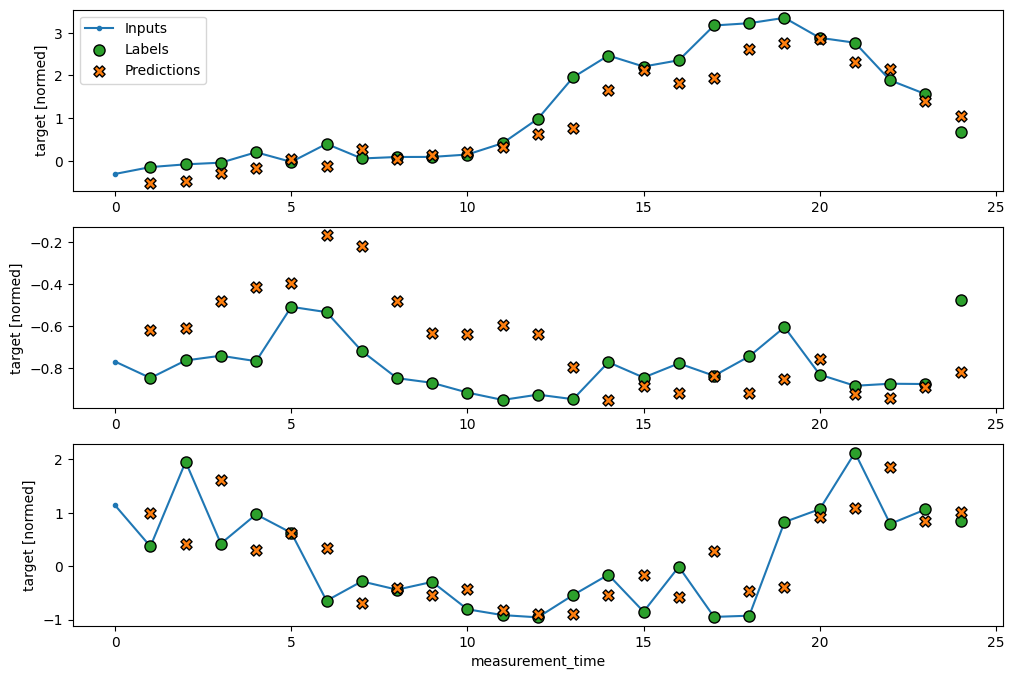

In [122]:
wide_window.plot(linear)

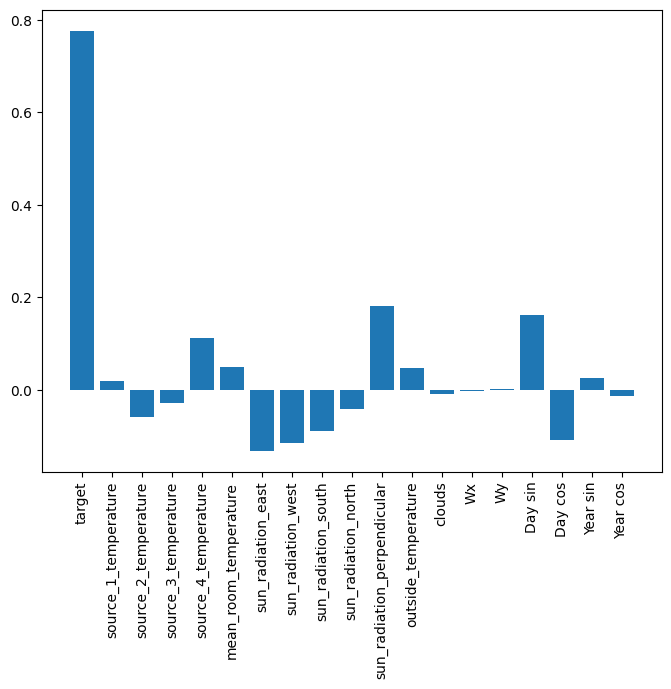

In [123]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [133]:
test_data = pd.read_csv('data/test.csv', index_col="ID")
test_data.fillna(method='ffill', inplace=True)

wv = test_data.pop('wind_speed')
wd_rad = test_data.pop('wind_direction')*np.pi / 180
test_data['Wx'] = wv*np.cos(wd_rad)
test_data['Wy'] = wv*np.sin(wd_rad)

date_time = pd.to_datetime(test_data.pop('measurement_time'), format='%Y-%m-%d %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

test_data['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
test_data['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
test_data['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
test_data['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

C:\Users\trist_243cr5c\AppData\Local\Temp\ipykernel_5224\3476454887.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [146]:
# Normalize the test data using the training mean and standard deviation
test_data_normalized = (test_data - train_mean) / train_std

# Prepare the test dataset using the WindowGenerator
test_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'],
    train_df=train_df, val_df=val_df, test_df=test_data_normalized
)

# Get predictions
predictions = linear.predict(test_window.test)

predictions

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[[nan]],

       [[nan]],

       [[nan]],

       ...,

       [[nan]],

       [[nan]],

       [[nan]]], dtype=float32)

In [147]:
predictions.shape

(1761, 1, 1)